# Проект "Анализ оттока клиентов для Метанпромбанк"

<b>Заказчик:</b> Региональный банк "Метанпромбанк" с отделениями в трех городах: Ярославль, Ростов Великий и Рыбинск.

<b>Задача:</b> Анализ оттока клиентов, сформировать портрет "отточного" клиента, а также выделить сегменты клиентов,
которые склонны уходить из банка.
В ходе исследования необходимо определить все значимые
признаки отточности (интервалы значений характеристик, которые связаны с
повышенным оттоком, сравните портреты типичных клиентов, которые
склонны и не склонны уходить из банка и т.д). Сформулировать и проверить статистические гипотезы. Объединить признаки отточности и сформировать сегменты, отобрать из них лучшие и дать по ним рекомендации.

<b>План работы:</b>
1. Загрузка данных и изучение информации;
2. Предобработка данных:
* исследование пропусков в датафрейме, проверка возможности заполнения пропущенных значений, уточнить у клиента причину отсутствия данных о балансе почти у 23% клиентов (нулевые значения баланса есть, значит NuN это не 0)
* проверка на дубликаты, в датафрейме 73  ID клиентов дублируются, в чем может быть причина (техническая ошибка, присвоение  ID ушедших клиентов новым, возможно уточнить у заказчика, почему в данных ID клиентов не уникальные?)
* исследование выбросов и аномалий
* кодирование значений (город, пол) для целей расчета корреляции 
3. Исследовательский анализ данных
* исследование распределения всех показателей в разрезе признака оттока, постоить визуализации по каждому признаку (возможно ли у заказчика получить данные о датах последней активности клиентов?)
* исследовать возможность и целесообразность категоризации признаков на основе распределения
* рассчитать корреляцию по всем показателям, построить таблицу и визуализации
* описать итоги исследовательского анализа, сформулировать предварительные выводы
4. Статистический анализ данных
* Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
* Проверьте гипотезу влияния фактора наличия кредитной карты у клиентов которые ушли и которые остались. 
* описать итоги статистического анализа, сформулировать предварительные выводы
5. Формирование сегментов
* объединить признаки отточности 
* сформировать сегменты
* отобрать лучшие сегменты по показателям объема и коэффициенту оттока 
* сформировать выводы и рекомендации
6. Презентация по итогам исследования




## Загрузка данных и изучение информации

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from scipy import stats as st

In [2]:
data=pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
data.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
pd.options.display.float_format='{:,.4f}'.format
data.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,"10,000.0000","171,814.7126","33,708.2381","94,561.0000","142,810.2500","172,728.0000","201,261.7500","229,145.0000"
score,"10,000.0000",848.6994,65.4485,642.0000,802.0000,853.0000,900.0000,"1,000.0000"
age,"9,974.0000",42.7344,12.1800,18.0000,33.0000,40.0000,51.0000,86.0000
equity,"10,000.0000",2.6276,1.9808,0.0000,0.0000,3.0000,4.0000,9.0000
balance,"7,705.0000","827,794.3065","1,980,614.1469",0.0000,"295,554.1600","524,272.2000","980,705.8500","119,113,552.0100"
products,"10,000.0000",1.8701,0.7926,0.0000,1.0000,2.0000,2.0000,5.0000
credit_card,"10,000.0000",0.6804,0.4663,0.0000,0.0000,1.0000,1.0000,1.0000
last_activity,"10,000.0000",0.5235,0.4995,0.0000,0.0000,1.0000,1.0000,1.0000
EST_SALARY,"10,000.0000","147,866.8855","139,388.5108","2,546.3000","75,251.9000","119,658.1050","174,500.5425","1,395,064.4500"
churn,"10,000.0000",0.1820,0.3859,0.0000,0.0000,0.0000,0.0000,1.0000


<b>Вывод по разделу:</b> В датафрейме 10000 срок и 12 столбцов, названия столбцов необходимо привести к нижнему регистру, из общей информации видно, что есть аномалия в столбце products - нулевое значение. Возраст клиентов банка от 18 до 86, тут всё логично, есть несколько категориальных показателей в датафрейме.

## Предобработка данных

Проверка на явные дубликаты - явные дубликаты не обнаружены.

In [6]:
data.duplicated().sum()

0

73 USERID дублируются в датафрейме

In [7]:
data['USERID'].value_counts().head(75)

227795    2
198635    2
210898    2
210627    2
202983    2
         ..
172142    2
164676    2
116540    2
176875    1
121630    1
Name: USERID, Length: 75, dtype: int64

Рассмотрим дубликаты, чтобы предположить причину их появления. Среди массива дубликатов прослеживается только одна закономерность, в каждой паре дубликатов один клиент из Ярославля, второй из Рыбинска. Проверим предположение.

In [8]:
duplic=data[data['USERID'].duplicated(keep=False)]
duplic.sort_values(by='USERID', ascending=False).head(30)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
6457,228075,839.0000,Рыбинск,М,39.0000,5,"507,199.8500",3,0,1,"85,195.8000",0
1247,228075,932.0000,Ярославль,М,NaN,5,"7,601,719.2000",2,1,1,"408,121.1600",0
8205,227795,840.0000,Рыбинск,М,34.0000,2,"350,768.0300",1,1,0,"102,036.1400",1
8497,227795,839.0000,Ярославль,М,34.0000,2,"326,593.1400",2,1,0,"103,314.9200",0
4216,226719,903.0000,Рыбинск,Ж,63.0000,0,NaN,1,1,0,"138,582.5800",0
2597,226719,990.0000,Ярославль,М,37.0000,4,"14,648,692.1400",2,0,0,"934,412.6100",1
6412,226550,939.0000,Ярославль,М,34.0000,0,NaN,1,1,1,"145,913.7300",0
8070,226550,940.0000,Рыбинск,М,NaN,0,NaN,1,0,1,"147,696.9500",0
9104,222480,776.0000,Рыбинск,Ж,NaN,5,"796,735.0900",1,1,1,"55,073.6300",0
6446,222480,776.0000,Ярославль,Ж,38.0000,5,"823,145.8300",2,1,1,"55,777.4400",0


Предположение подтвердилось, дубликаты разделяются по городам ровно пополам, очевидно произошел сбой и в какой-то период идентичные ID присваивались в двух городах. Так как в дубликатах все данные уникальные, кроме ID, мы эти данные не удаляем.

In [9]:
duplic['city'].value_counts()

Рыбинск      73
Ярославль    73
Name: city, dtype: int64

In [10]:
data['churn'].value_counts()

0    8180
1    1820
Name: churn, dtype: int64

Определили средний процент оттока - 18,2%

Рассмотрим количество уникальных значений в каждом столбце

In [11]:
data.nunique()

USERID           9927
score             348
city                3
gender              2
age                68
equity             10
balance          7701
products            6
credit_card         2
last_activity       2
EST_SALARY       9996
churn               2
dtype: int64

Рассмотрим количество пропусков, почти 23% значений пропущено в столбце balance, проверим связь пропусков с другими значениями, исследуем возможно ли заполнить медианой

In [12]:
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [13]:
data['void']=data['balance'].isna()

In [14]:
data_pivot=data.pivot_table(index=['void'], values=['score', 'age', 'equity', 'products', 'EST_SALARY'], aggfunc=['mean', 'median'])
data_pivot

mean                                        median          \
        EST_SALARY     age equity products    score   EST_SALARY     age   
void                                                                       
False 124,501.8724 42.9244 3.3951   2.0810 843.7393 106,222.2000 40.0000   
True  226,310.2087 42.0930 0.0510   1.1621 865.3521 174,160.6800 40.0000   

                                
      equity products    score  
void                            
False      4        2 840.0000  
True       0        1 903.0000

Что касается пропусков в графе "возраст" - можно заполнить медианой. Наиболее значимая корреляция значений столбца balance с EST_SALARY, equity. 

In [15]:
miss_pivot=data.pivot_table(index=['void'], values=['EST_SALARY', 'score', 'age', 'equity', 'products'], aggfunc=['mean']).T

miss_pivot['Относительная ошибка']=(miss_pivot[False]-miss_pivot[True])/miss_pivot[False]
miss_pivot

void                   False         True  Относительная ошибка
mean EST_SALARY 124,501.8724 226,310.2087               -0.8177
     age             42.9244      42.0930                0.0194
     equity           3.3951       0.0510                0.9850
     products         2.0810       1.1621                0.4416
     score          843.7393     865.3521               -0.0256

Проверим выявленную связь с категорией equity. Почти у всех пропусков (95%) значение equity = 0.


In [16]:
data_miss_eq=data.loc[data['equity'] == 0]
data_miss_eq.isna().sum()

USERID              0
score               0
city                0
gender              0
age                16
equity              0
balance          2180
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
void                0
dtype: int64

In [17]:
data['equity'].value_counts()

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

In [18]:
warnings.simplefilter('ignore')

In [19]:
data['age']=data['age'].fillna(40)

In [20]:
data['age']=data['age'].astype(int)

во всем датафрейме только 2592 значения с оценко собственности = 0 и при этом 2180 связаны с отсутствием баланса, по всей видимости технический сбой привел к обнулению оценки собственности и удалению баланса, дополнительно рассмотрим диапазон оценочных размеров заработных плат у клиентов с отсутствующим балансом:

In [21]:
data_miss=data.loc[data['void'] == True]
data_miss.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,"2,295.0000","172,069.4479","33,337.0846","114,182.0000","143,095.5000","172,659.0000","201,551.0000","229,145.0000"
score,"2,295.0000",865.3521,89.6031,642.0000,871.0000,903.0000,922.0000,990.0000
age,"2,295.0000",42.0784,11.9011,18.0000,33.0000,40.0000,49.0000,86.0000
equity,"2,295.0000",0.0510,0.2259,0.0000,0.0000,0.0000,0.0000,3.0000
balance,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,"2,295.0000",1.1621,0.4025,0.0000,1.0000,1.0000,1.0000,3.0000
credit_card,"2,295.0000",0.8157,0.3878,0.0000,1.0000,1.0000,1.0000,1.0000
last_activity,"2,295.0000",0.5495,0.4977,0.0000,0.0000,1.0000,1.0000,1.0000
EST_SALARY,"2,295.0000","226,310.2087","199,771.7937","20,274.0300","120,347.7000","174,160.6800","240,014.9950","1,333,687.3600"
churn,"2,295.0000",0.0057,0.0751,0.0000,0.0000,0.0000,0.0000,1.0000


Оценочная заработная плата у клиентов без баланса от 20 274 до 1 333 687 рублей, при этом только менее чем у 25% клиентов оценочная заработная плата менее 120000 рублей, явно, что 0 в графе equity и пропуски баланса - это ошибка.

Кодируем данные по городу и полу

In [22]:
data=data.join(pd.get_dummies(data['city']))
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,void,Ростов,Рыбинск,Ярославль
0,183012,850.0000,Рыбинск,Ж,25,1,"59,214.8200",2,0,1,"75,719.1400",1,False,0,1,0
1,146556,861.0000,Рыбинск,Ж,37,5,"850,594.3300",3,1,0,"86,621.7700",0,False,0,1,0
2,120722,892.0000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.3400",0,True,0,1,0
3,225363,866.0000,Ярославль,Ж,51,5,"1,524,746.2600",2,0,1,"174,423.5300",1,False,0,0,1
4,157978,730.0000,Ярославль,М,34,5,174.0000,1,1,0,"67,353.1600",1,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0000,Рыбинск,М,27,1,"78,144.6500",1,0,1,"18,943.6400",0,False,0,1,0
9996,139170,894.0000,Ярославль,М,46,0,NaN,1,1,0,"196,898.2900",0,True,0,0,1
9997,115639,903.0000,Ярославль,М,24,0,NaN,2,1,1,"108,905.0900",0,True,0,0,1
9998,148700,777.0000,Ярославль,Ж,68,3,"865,457.9700",3,0,1,"86,874.9000",0,False,0,0,1


In [23]:
data['sex']=data['gender'] 
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,void,Ростов,Рыбинск,Ярославль,sex
0,183012,850.0000,Рыбинск,Ж,25,1,"59,214.8200",2,0,1,"75,719.1400",1,False,0,1,0,Ж
1,146556,861.0000,Рыбинск,Ж,37,5,"850,594.3300",3,1,0,"86,621.7700",0,False,0,1,0,Ж
2,120722,892.0000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.3400",0,True,0,1,0,Ж
3,225363,866.0000,Ярославль,Ж,51,5,"1,524,746.2600",2,0,1,"174,423.5300",1,False,0,0,1,Ж
4,157978,730.0000,Ярославль,М,34,5,174.0000,1,1,0,"67,353.1600",1,False,0,0,1,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0000,Рыбинск,М,27,1,"78,144.6500",1,0,1,"18,943.6400",0,False,0,1,0,М
9996,139170,894.0000,Ярославль,М,46,0,NaN,1,1,0,"196,898.2900",0,True,0,0,1,М
9997,115639,903.0000,Ярославль,М,24,0,NaN,2,1,1,"108,905.0900",0,True,0,0,1,М
9998,148700,777.0000,Ярославль,Ж,68,3,"865,457.9700",3,0,1,"86,874.9000",0,False,0,0,1,Ж


In [24]:
data.loc[data['sex'] == 'М', 'sex'] = 1
data.loc[data['sex'] == 'Ж', 'sex'] = 0
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,void,Ростов,Рыбинск,Ярославль,sex
0,183012,850.0000,Рыбинск,Ж,25,1,"59,214.8200",2,0,1,"75,719.1400",1,False,0,1,0,0
1,146556,861.0000,Рыбинск,Ж,37,5,"850,594.3300",3,1,0,"86,621.7700",0,False,0,1,0,0
2,120722,892.0000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.3400",0,True,0,1,0,0
3,225363,866.0000,Ярославль,Ж,51,5,"1,524,746.2600",2,0,1,"174,423.5300",1,False,0,0,1,0
4,157978,730.0000,Ярославль,М,34,5,174.0000,1,1,0,"67,353.1600",1,False,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0000,Рыбинск,М,27,1,"78,144.6500",1,0,1,"18,943.6400",0,False,0,1,0,1
9996,139170,894.0000,Ярославль,М,46,0,NaN,1,1,0,"196,898.2900",0,True,0,0,1,1
9997,115639,903.0000,Ярославль,М,24,0,NaN,2,1,1,"108,905.0900",0,True,0,0,1,1
9998,148700,777.0000,Ярославль,Ж,68,3,"865,457.9700",3,0,1,"86,874.9000",0,False,0,0,1,0


Переименуем столбцы

In [25]:
data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace = True)

Удалим строку с аномальным значением 0 в столбце products

In [26]:
data=data.loc[data['products'] != 0]

<b>Выводы по разделу:</b> Исследовали датафрейм на дубликаты и пропуски, явных дубликатов не обнаружено, но есть 73 дубликата user_id, дубликаты проверены, по ним нет повторения в остальных параметрах, по всей видимости техническая ошибка, дублирование user_id по городу Ярославль и Рыбинск. Выявлено и удалено аномальное значение - строка с 0 в графе количество продуктов банка. Для корректного расчета корреляции закодированы данные по полу и городу. Выявло значительное количество пропусков в графе баланс и небольшое количество в графе возраст, пропуски исследованы, выявленна связь с категорией equity, почти у всех пропусков (95%) значение equity = 0. Оценочная заработная плата у клиентов без баланса от 20 274 до 1 333 687 рублей, при этом только менее чем у 25% клиентов оценочная заработная плата менее 120000 рублей, явно, что 0 в графе equity и пропуски баланса - это ошибка.

## Исследовательский анализ данных

Сравним распределения по четырем показателям в разрезе категорий отток/не отток.
Распределение по возрасту и EST_SALARY у обеих категорий примерно совпадает, распределение по скоринговой оценке заметно отличается, в категории "отток" минимальная оценка скоринга значительно выше.

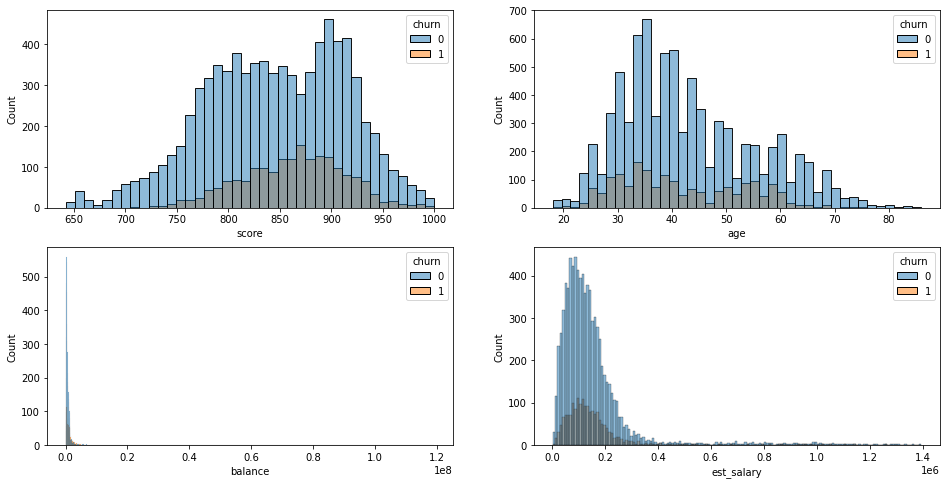

In [27]:
num_cols=['score', 'age', 'balance', 'est_salary']
churn='churn'
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 8))
for i, col in enumerate(num_cols):
    ax = axes[int(i/2), i%2]
    sns.histplot(data, x=col, ax=ax, hue=churn)

Рассчитаем и визуализируем распределение по каждому показателю в категории "отток" 

In [28]:
def table_churn(column):
    data_table = data.pivot_table(index=column, columns='churn', values='user_id', aggfunc='count') 
    data_table.columns=['not_churn', 'churn']
    data_table['total']=data_table['not_churn']+data_table['churn']
    data_table['persent_churn']=data_table['churn']/data_table['total']*100
    return data_table


In [29]:
def table_plot(table, title, x_title):
    mean_persent_churn=18.2
    table['persent_churn'].plot(kind='bar', figsize=(12,5))
    plt.axhline (y=mean_persent_churn, color='red', linestyle= '--', label='средний % оттока')

    plt.title(title, fontsize=14)
    plt.xlabel(x_title)
    plt.ylabel('Процент оттока')
    plt.legend();


In [30]:
data_g=table_churn('gender')
data_g

,not_churn,churn,total,persent_churn
gender,,,,
Ж,4358,636,4994,12.7353
М,3822,1183,5005,23.6364


Процент оттока среди мужчин выше среднего, показатель можно использовать для формирования сегментов

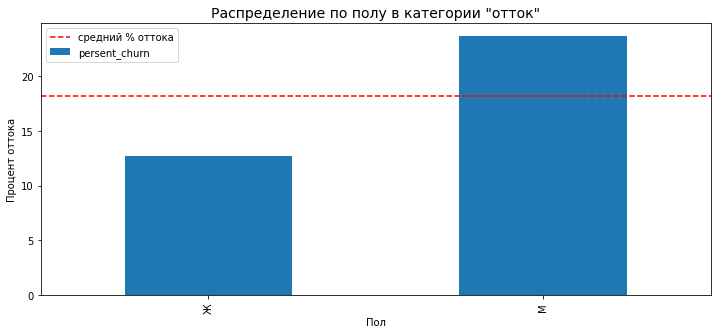

In [31]:
table_plot(data_g, 'Распределение по полу в категории "отток"', 'Пол')

In [32]:
data_city = table_churn('city')
data_city

,not_churn,churn,total,persent_churn
city,,,,
Ростов,1151,266,1417,18.7721
Рыбинск,2258,436,2694,16.1841
Ярославль,4771,1117,5888,18.9708


Средний процент оттока по городам отличается в несзначительной степени, превышение среднего показателя незначительно, очевидно местопроживвание клиентов не влияет на желание покинуть банк

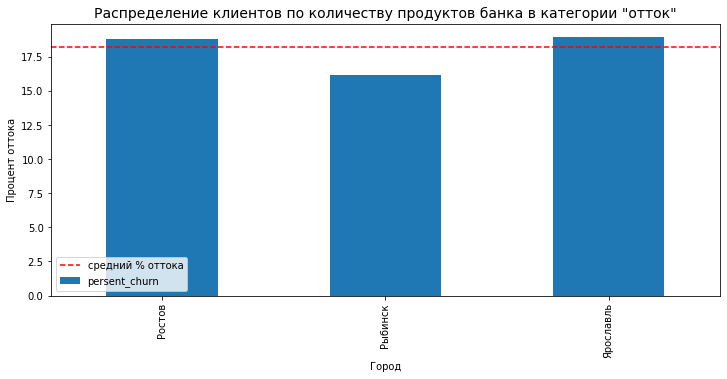

In [33]:
table_plot(data_city, 'Распределение клиентов по количеству продуктов банка в категории "отток"', 'Город')

In [34]:
data_products=table_churn('products')
data_products

,not_churn,churn,total,persent_churn
products,,,,
1,3106,235,3341,7.0338
2,4147,979,5126,19.0987
3,742,297,1039,28.5852
4,174,300,474,63.2911
5,11,8,19,42.1053


Интересная закономерность, чем больше продуктов банка использует клиент, тем выше доля оттока, очевидно есть проблемы с одним из продуков банка

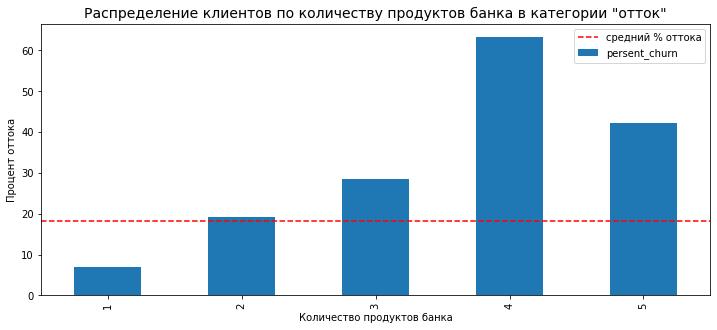

In [35]:
table_plot(data_products, 'Распределение клиентов по количеству продуктов банка в категории "отток"', 'Количество продуктов банка')

In [36]:
data_cc=table_churn('credit_card') 
data_cc

,not_churn,churn,total,persent_churn
credit_card,,,,
0,2379,816,3195,25.5399
1,5801,1003,6804,14.7413


Судя по всему, кредитная карта не вызывает проблем у клиентов, показатель оттока по даннму продукту ниже среднего, а вот у клиентов не использующих крдитную карту процент оттока выше среднего

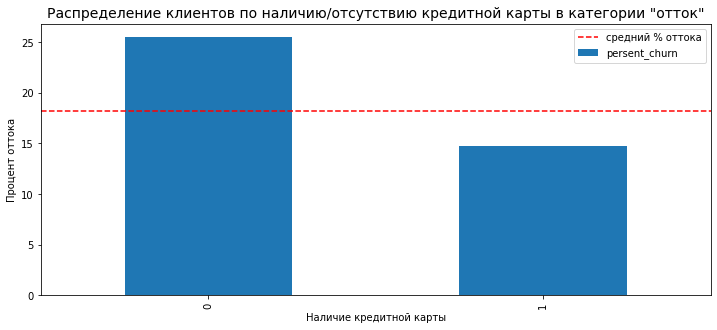

In [37]:
table_plot(data_cc, 'Распределение клиентов по наличию/отсутствию кредитной карты в категории "отток"', 'Наличие кредитной карты')

In [38]:
data_equity=table_churn('equity') 
data_equity

,not_churn,churn,total,persent_churn
equity,,,,
0,2502,90,2592,3.4722
1,681,93,774,12.0155
2,886,166,1052,15.7795
3,1221,321,1542,20.8171
4,1386,464,1850,25.0811
5,1341,577,1918,30.0834
6,103,58,161,36.0248
7,43,37,80,46.2500
8,11,6,17,35.2941


Опять же интересная закономерность, чем выше категория оценки собственности, тем выше процент оттока, складывается впечатление, что из банка уходят наиболее состоятельные и платежеспособные клиенты

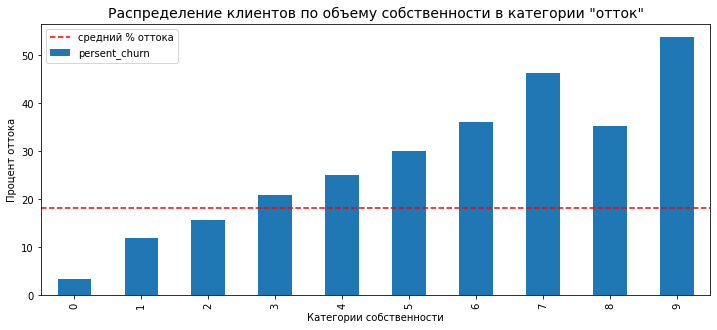

In [39]:
table_plot(data_equity, 'Распределение клиентов по объему собственности в категории "отток"', 'Категории собственности')

In [40]:
data_age=table_churn('age') 
data_age

,not_churn,churn,total,persent_churn
age,,,,
18,12.0000,1.0000,13.0000,7.6923
19,15.0000,1.0000,16.0000,6.2500
20,20.0000,3.0000,23.0000,13.0435
21,11.0000,4.0000,15.0000,26.6667
22,23.0000,4.0000,27.0000,14.8148
...,...,...,...,...
81,4.0000,NaN,NaN,NaN
82,2.0000,NaN,NaN,NaN
83,3.0000,NaN,NaN,NaN


Превышение среднешго показателя в 21 год и 79 можем не учитывать, т.к. 21 год всего 11 клиентов, а 79 всего два, мы наблюдаем два выраженных возрастных диапазона с высоким процентом оттока, имеет смысл для дальнейшего анализа и сегментации клиентов, разбить на категории и выделить: 18-24, 25-35, 36-49, 50-60 и остальные.

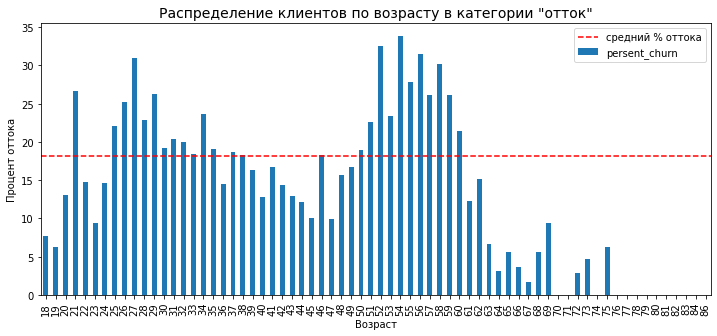

In [41]:
table_plot(data_age, 'Распределение клиентов по возрасту в категории "отток"', 'Возраст')


In [42]:
data_last_activity=table_churn('last_activity')
data_last_activity

,not_churn,churn,total,persent_churn
last_activity,,,,
0,4223,541,4764,11.3560
1,3957,1278,5235,24.4126


Очень странно, что среди активных клиентов показатель оттока выше среднего

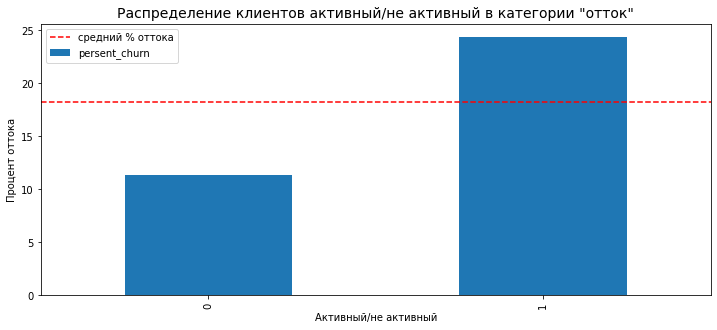

In [43]:
table_plot(data_last_activity, 'Распределение клиентов активный/не активный в категории "отток"', 'Активный/не активный')


In [44]:
data_score=table_churn('score')
data_score

,not_churn,churn,total,persent_churn
score,,,,
642.0000,2.0000,NaN,NaN,NaN
646.0000,2.0000,NaN,NaN,NaN
648.0000,2.0000,NaN,NaN,NaN
649.0000,7.0000,NaN,NaN,NaN
650.0000,2.0000,NaN,NaN,NaN
...,...,...,...,...
996.0000,2.0000,NaN,NaN,NaN
997.0000,2.0000,NaN,NaN,NaN
998.0000,1.0000,NaN,NaN,NaN


Подтверждается предположение, что в категории "отток" платежеспособные клиенты с высоким скоринговым рейтингом. Для сегментации можно выделить диапазон с 825-900 и 950-1000

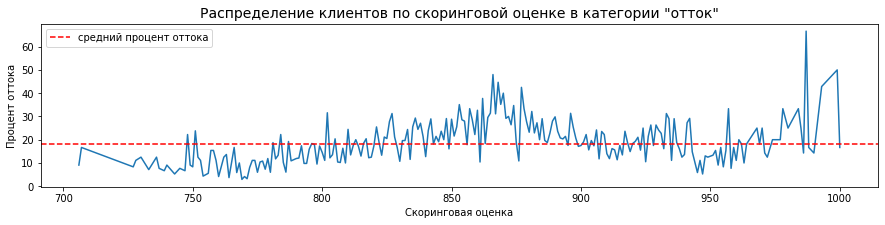

In [45]:
plt.figure(figsize=(15, 3))
ax = sns.lineplot(x='score', y='persent_churn', data=data_score) 
plt.axhline (y=18, color='red', linestyle= '--', label='средний процент оттока')
plt.title('Распределение клиентов по скоринговой оценке в категории "отток"', fontsize=14)
plt.xlabel('Скоринговая оценка')
plt.ylabel('Процент оттока')
plt.legend();

Сформируем портрет клиента в разрезе категорий: действующий клиент и отток. Получается, что в категории отток у нас преимущественно мужчины, средний возраст которых 41 год, со средним балансом на 54: больше, чем у действующих клиентов, с оценкой собственности 4, активные клиенты, использующие более двух продуктов банка.

In [46]:
client_portret=data.pivot_table(index=['churn'], values=['credit_card', 'last_activity', 'score', 'age', 'equity', 'products', 'est_salary', 'balance'], aggfunc=['mean', 'median']).T
client_portret['percent']=(client_portret[1]-client_portret[0])/client_portret[0]*100
client_portret

churn                           0              1  percent
mean   age                43.0116        41.4288  -3.6800
       balance       733,982.5856 1,133,993.2714  54.4987
       credit_card         0.7092         0.5514 -22.2467
       equity              2.3748         3.7642  58.5030
       est_salary    147,783.2001   148,310.7282   0.3570
       last_activity       0.4837         0.7026  45.2397
       products            1.7576         2.3771  35.2502
       score             845.4284       863.3469   2.1195
median age                40.0000        39.0000  -2.5000
       balance       475,382.4450   782,410.4700  64.5855
       credit_card         1.0000         1.0000   0.0000
       equity              3.0000         4.0000  33.3333
       est_salary    118,257.7150   125,395.2200   6.0356
       last_activity       0.0000         1.0000      inf
       products            2.0000         2.0000   0.0000
       score             848.0000       866.0000   2.1226

В рамках формирования портрета клиента, получается, что в отток у нас попадают преимущественно мужчины, а действующими клиентами преимущественно являются женщины

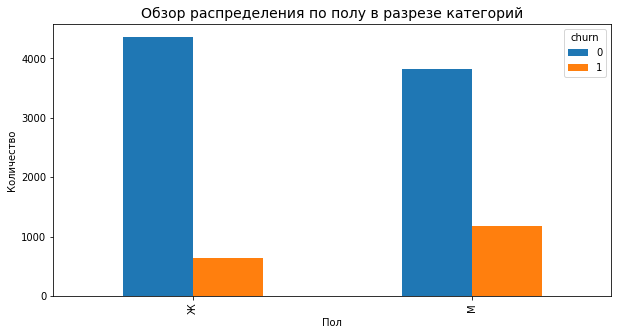

In [47]:
client=data.pivot_table(index='gender', columns='churn', values='user_id', aggfunc='count').plot(kind='bar', figsize=(10,5))

plt.title('Обзор распределения по полу в разрезе категорий', fontsize=14)
plt.xlabel('Пол')
plt.ylabel('Количество');

Что касается распределения по городам, то в обеих категориях преимущественно клиенты из Ярославля

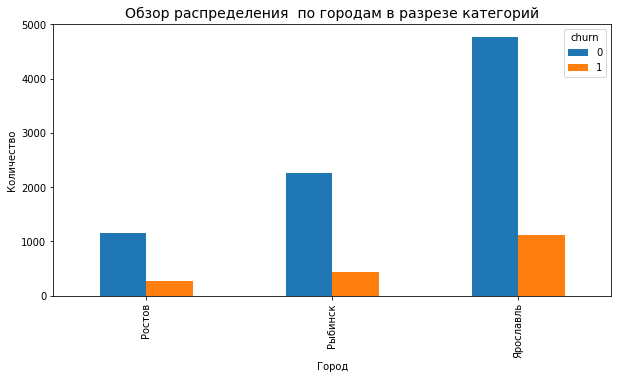

In [48]:
client_city=data.pivot_table(index='city', columns='churn', values='user_id', aggfunc='count').plot(kind='bar', figsize=(10,5))

plt.title('Обзор распределения  по городам в разрезе категорий', fontsize=14)
plt.xlabel('Город')
plt.ylabel('Количество');

In [49]:
corr = data.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,void,Ростов,Рыбинск,Ярославль
user_id,1.000000,0.009929,0.017589,0.004612,0.006133,-0.004673,0.005571,-0.031106,-0.000431,-0.011780,0.004256,-0.033687,0.014735,0.010591
score,0.009929,1.000000,-0.012370,0.064103,0.235812,-0.003708,-0.094503,-0.031004,0.164049,0.105634,0.138598,-0.037572,-0.000609,0.027180
age,0.017589,-0.012370,1.000000,0.020910,0.069621,0.018263,-0.122728,-0.008126,-0.039399,-0.050217,-0.029677,0.047274,0.028668,-0.059357
equity,0.004612,0.064103,0.020910,1.000000,0.164126,0.432235,-0.167497,-0.001950,-0.171965,0.270581,-0.710106,0.036300,-0.005651,-0.020634
balance,0.006133,0.235812,0.069621,0.164126,1.000000,0.075684,-0.059253,0.025004,0.339622,0.085577,nan,-0.035805,-0.034697,0.057342
products,-0.004673,-0.003708,0.018263,0.432235,0.075684,1.000000,-0.251831,0.036905,-0.118299,0.301616,-0.487297,-0.006223,-0.042259,0.042515
credit_card,0.005571,-0.094503,-0.122728,-0.167497,-0.059253,-0.251831,1.000000,-0.033603,0.035432,-0.130524,0.158645,-0.098534,-0.049880,0.114816
last_activity,-0.031106,-0.031004,-0.008126,-0.001950,0.025004,0.036905,-0.033603,1.000000,0.002947,0.169037,0.028561,0.006962,0.048993,-0.049111
est_salary,-0.000431,0.164049,-0.039399,-0.171965,0.339622,-0.118299,0.035432,0.002947,1.000000,0.001460,0.307379,-0.106101,-0.057300,0.126870
churn,-0.011780,0.105634,-0.050217,0.270581,0.085577,0.301616,-0.130524,0.169037,0.001460,1.000000,-0.249907,0.006112,-0.031605,0.024165


Наибольшие значения корреляции оттока с показателями: количества продуктов банка, оценки собственности, активности, наличия кредитной карты и скоринговой оценки. Учтем эти показатели при формировании сегментов.

### Предварительные выводы по итогам исследовательского анализа:
Мы выяснили, что процент оттока среди мужчин выше среднего, показатель можно использовать для формирования сегментов.
Средний процент оттока по городам отличается в несзначительной степени, превышение среднего показателя незначительно, очевидно местопроживвание клиентов не влияет на желание покинуть банк. Выявлена закономерность, чем больше продуктов банка использует клиент, тем выше доля оттока, очевидно есть проблемы с одним из продуков банка. Однако, кредитная карта не вызывает проблем у клиентов, показатель оттока по даннму продукту ниже среднего, а вот у клиентов не использующих крдитную карту процент оттока выше среднего.
Так же выявлено, что чем выше категория оценки собственности, тем выше процент оттока, складывается впечатление, что из банка уходят наиболее состоятельные и платежеспособные клиенты.
Исследую процент оттока в возрастном распределении клиентов, мы наблюдаем два выраженных возрастных диапазона с высоким процентом оттока: 25-35, 50-60. Помимо этого выявлено, что среди активных клиентов показатель оттока выше среднего.
Подтверждается предположение, что в категории "отток" платежеспособные клиенты с высоким скоринговым рейтингом. Для сегментации можно выделить диапазон с 825-900 и 950-1000.
Сформирован портрет клиента, попадающего в категорию "отток": преимущественно мужчины, средний возраст которых 41 год, со средним балансом на 54% больше, чем у действующих клиентов, с оценкой собственности 4, активные клиенты, использующие более двух продуктов банка, с более высокой средней скоринговой оценкой.


## Статистический анализ

In [50]:
data_active=data.loc[data['churn'] == 0]
data_churn=data.loc[data['churn'] == 1]

Для проверки гипотез используем статистический тест с использованием t-распределения для проверкой равенства средних значений в двух выборках

Проверим гипотезу: различия дохода между теми клиентами, которые ушли и теми, которые остались. Для проверки гипотезы проведем статистический тест. 

Нулевая гипотеза: Доход у клиентов, которые ушли и которые остались одинаковый; 
Альтернативная гипотеза: Доход у клиентов, которые ушли и которые остались разный;

In [51]:
alpha = 0.05 

results = st.ttest_ind(
    data_active['est_salary'], 
    data_churn['est_salary'],
    alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.558031778340917
Не получилось отвергнуть нулевую гипотезу


Подтверждается нулевая гипотеза: Доход у клиентов, которые ушли и которые остались одинаковый.

Проверим гипотезу влияния фактора наличия кредитной карты у клиентов которые ушли и которые остались.
Нулевая гипотеза: Наличие кредитной карты не влияет
Альтернативная гипотеза: Наличие кредитной карты влияет

In [52]:
alpha = 0.05 

results = st.ttest_ind(
    data_active['credit_card'], 
    data_churn['credit_card'],
    alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.5163214976125262e-39
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, наличие кредитной карты влияет на отток клиентов

 Для проверки гипотез используем статистический тест с использованием t-распределения для проверкой равенства средних значений в двух выборках

## Формирование сегментов

Рассмотрим различные комбинации параметров для формирования сегментов и выявления устойчивой высокой взаимосвязи с процентом оттока.
Сегменты:

    1. Мужчины, возраст 25-35, количество продуктов банка от 3-5
    
    2. Мужчины, возраст 50-60, количество продуктов банка от 3-5
    
    3. Мужчины, возраст 25-35, equity 3 и более
    
    4. Мужчины, возраст 50-60, equity 3 и более
    
    5. Мужчины, возраст 25-35, 840-1000
    
    6. Мужчины, возраст 50-60, 840-1000 и т.д.

In [53]:
group_1=data.query('age>=25 & age<=35 & gender== "М" & products>=3')
group_2=data.query('age>=50 & age<=60 & gender== "М" & products>=3')
group_3=data.query('age>=25 & age<=35 & gender== "М" & equity>=3')
group_4=data.query('age>=50 & age<=60 & gender== "М" & equity>=3')
group_5=data.query('age>=25 & age<=35 & gender== "М" & score>=840')
group_6=data.query('age>=50 & age<=60 & gender== "М" & score>=840')
group_7=data.query('age>=25 & age<=35 & gender== "М" & last_activity==1')
group_8=data.query('age>=50 & age<=60 & gender== "М" & last_activity==1')
group_9=data.query('products>=3 & equity>=3 & last_activity==1')
group_10=data.query('products>=3 & equity>=3 & score>=840')
group_11=data.query('last_activity==1 & equity>=3 & score>=840')
group_12=data.query('last_activity==1 & equity>=3 & gender== "М"')
group_13=data.query('last_activity==1 & equity>=3 & age>=50 & age<=60')
group_14=data.query('last_activity==1 & equity>=3 & age>=25 & age<=35')
group_15=data.query('last_activity==1 & products>=3 & gender== "М"')
group_16=data.query('last_activity==1 & products>=3 & age>=50 & age<=60')
group_17=data.query('last_activity==1 & products>=3 & age>=25 & age<=35')
group_18=data.query('last_activity==1 & score>=840 & gender== "М"')
group_19=data.query('last_activity==1 & score>=840 & age>=50 & age<=60')
group_20=data.query('last_activity==1 & score>=840 & age>=25 & age<=35')
group_21=data.query('equity>=3 & score>=840 & gender== "М"')
group_22=data.query('equity>=3 & products>=3 & gender== "М"')
group_23=data.query('equity>=3 & score>=840 & age>=50 & age<=60')
group_24=data.query('equity>=3 & products>=3 & age>=50 & age<=60')
group_25=data.query('equity>=3 & score>=840 & age>=25 & age<=35')
group_26=data.query('equity>=3 & products>=3 & age>=25 & age<=35')  
group_27=data.query('equity>=3 & products>=3 & credit_card==0') 
group_28=data.query('last_activity==1 & equity>=3 & credit_card==0') 
group_29=data.query('products>=3 & gender== "М" & credit_card==0') 
group_30=data.query('products>=3 & age>=25 & age<=35 & credit_card==0')
group_31=data.query('equity>=3 & score>=840 & credit_card==0')

In [54]:
def group_churn(table):
    group_ch = table.pivot_table(columns='churn', values='user_id', aggfunc='count') 
    group_ch.columns=['not_churn', 'churn']
    group_ch['total']=group_ch['not_churn']+group_ch['churn']
    group_ch['persent_churn']=group_ch['churn']/group_ch['total']*100
    return group_ch

In [55]:
group_1_table=group_churn(group_1)
row_names = {'user_id': 'Сегмент_1'}
group_1_table= group_1_table.rename(index = row_names)
group_1_table

,not_churn,churn,total,persent_churn
Сегмент_1,130,129,259,49.8069


In [56]:
group_2_table=group_churn(group_2) 
row_names = {'user_id': 'Сегмент_2'}
group_2_table= group_2_table.rename(index = row_names)
group_2_table

,not_churn,churn,total,persent_churn
Сегмент_2,56,92,148,62.1622


In [57]:
group_3_table=group_churn(group_3)
row_names = {'user_id': 'Сегмент_3'}
group_3_table= group_3_table.rename(index = row_names)
group_3_table

,not_churn,churn,total,persent_churn
Сегмент_3,583,385,968,39.7727


In [58]:
group_4_table=group_churn(group_4) 
row_names = {'user_id': 'Сегмент_4'}
group_4_table= group_4_table.rename(index = row_names)
group_4_table

,not_churn,churn,total,persent_churn
Сегмент_4,251,219,470,46.5957


In [59]:
group_5_table=group_churn(group_5) 
row_names = {'user_id': 'Сегмент_5'}
group_5_table= group_5_table.rename(index = row_names)
group_5_table

,not_churn,churn,total,persent_churn
Сегмент_5,705,339,1044,32.4713


In [60]:
group_6_table=group_churn(group_6) 
row_names = {'user_id': 'Сегмент_6'}
group_6_table= group_6_table.rename(index = row_names)
group_6_table

,not_churn,churn,total,persent_churn
Сегмент_6,282,165,447,36.9128


In [61]:
group_7_table=group_churn(group_7) 
row_names = {'user_id': 'Сегмент_7'}
group_7_table= group_7_table.rename(index = row_names)
group_7_table

,not_churn,churn,total,persent_churn
Сегмент_7,638,335,973,34.4296


In [62]:
group_8_table=group_churn(group_8) 
row_names = {'user_id': 'Сегмент_8'}
group_8_table= group_8_table.rename(index = row_names)
group_8_table

,not_churn,churn,total,persent_churn
Сегмент_8,239,157,396,39.6465


In [63]:
group_9_table=group_churn(group_9) 
row_names = {'user_id': 'Сегмент_9'}
group_9_table= group_9_table.rename(index = row_names)
group_9_table

,not_churn,churn,total,persent_churn
Сегмент_9,334,343,677,50.6647


In [64]:
group_10_table=group_churn(group_10) 
row_names = {'user_id': 'Сегмент_10'}
group_10_table= group_10_table.rename(index = row_names)
group_10_table

,not_churn,churn,total,persent_churn
Сегмент_10,355,384,739,51.9621


In [65]:
group_11_table=group_churn(group_11) 
row_names = {'user_id': 'Сегмент_11'}
group_11_table= group_11_table.rename(index = row_names)
group_11_table

,not_churn,churn,total,persent_churn
Сегмент_11,776,861,1637,52.5962


In [66]:
group_12_table=group_churn(group_12)
row_names = {'user_id': 'Сегмент_12'}
group_12_table= group_12_table.rename(index = row_names)
group_12_table

,not_churn,churn,total,persent_churn
Сегмент_12,760,650,1410,46.0993


In [67]:
group_13_table=group_churn(group_13) 
row_names = {'user_id': 'Сегмент_13'}
group_13_table= group_13_table.rename(index = row_names)
group_13_table

,not_churn,churn,total,persent_churn
Сегмент_13,298,246,544,45.2206


In [68]:
group_14_table=group_churn(group_14) 
row_names = {'user_id': 'Сегмент_14'}
group_14_table= group_14_table.rename(index = row_names)
group_14_table

,not_churn,churn,total,persent_churn
Сегмент_14,503,455,958,47.4948


In [69]:
group_15_table=group_churn(group_15) 
row_names = {'user_id': 'Сегмент_15'}
group_15_table= group_15_table.rename(index = row_names)
group_15_table

,not_churn,churn,total,persent_churn
Сегмент_15,188,226,414,54.5894


In [70]:
group_16_table=group_churn(group_16)
row_names = {'user_id': 'Сегмент_16'}
group_16_table= group_16_table.rename(index = row_names)
group_16_table

,not_churn,churn,total,persent_churn
Сегмент_16,65,90,155,58.0645


In [71]:
group_17_table=group_churn(group_17) 
row_names = {'user_id': 'Сегмент_17'}
group_17_table= group_17_table.rename(index = row_names)
group_17_table

,not_churn,churn,total,persent_churn
Сегмент_17,124,134,258,51.9380


In [72]:
group_18_table=group_churn(group_18)
row_names = {'user_id': 'Сегмент_18'}
group_18_table= group_18_table.rename(index = row_names)
group_18_table

,not_churn,churn,total,persent_churn
Сегмент_18,853,545,1398,38.9843


In [73]:
group_19_table=group_churn(group_19)
row_names = {'user_id': 'Сегмент_19'}
group_19_table= group_19_table.rename(index = row_names)
group_19_table

,not_churn,churn,total,persent_churn
Сегмент_19,295,206,501,41.1178


In [74]:
group_20_table=group_churn(group_20)
row_names = {'user_id': 'Сегмент_20'}
group_20_table= group_20_table.rename(index = row_names)
group_20_table

,not_churn,churn,total,persent_churn
Сегмент_20,543,441,984,44.8171


In [75]:
group_21_table=group_churn(group_21)
row_names = {'user_id': 'Сегмент_21'}
group_21_table= group_21_table.rename(index = row_names)
group_21_table

,not_churn,churn,total,persent_churn
Сегмент_21,858,710,1568,45.2806


In [76]:
group_22_table=group_churn(group_22)
row_names = {'user_id': 'Сегмент_22'}
group_22_table= group_22_table.rename(index = row_names)
group_22_table

,not_churn,churn,total,persent_churn
Сегмент_22,285,332,617,53.8088


In [77]:
group_23_table=group_churn(group_23) 
row_names = {'user_id': 'Сегмент_23'}
group_23_table= group_23_table.rename(index = row_names)
group_23_table

,not_churn,churn,total,persent_churn
Сегмент_23,364,253,617,41.0049


In [78]:
group_24_table=group_churn(group_24)
row_names = {'user_id': 'Сегмент_24'}
group_24_table= group_24_table.rename(index = row_names)
group_24_table

,not_churn,churn,total,persent_churn
Сегмент_24,103,136,239,56.9038


In [79]:
group_25_table=group_churn(group_25)
row_names = {'user_id': 'Сегмент_25'}
group_25_table= group_25_table.rename(index = row_names)
group_25_table

,not_churn,churn,total,persent_churn
Сегмент_25,563,473,1036,45.6564


In [80]:
group_26_table=group_churn(group_26) 
row_names = {'user_id': 'Сегмент_26'}
group_26_table= group_26_table.rename(index = row_names)
group_26_table

,not_churn,churn,total,persent_churn
Сегмент_26,185,169,354,47.7401


In [81]:
group_27_table=group_churn(group_27)
row_names = {'user_id': 'Сегмент_27'}
group_27_table= group_27_table.rename(index = row_names)
group_27_table

,not_churn,churn,total,persent_churn
Сегмент_27,428,236,664,35.5422


In [82]:
group_28_table=group_churn(group_28)
row_names = {'user_id': 'Сегмент_28'}
group_28_table= group_28_table.rename(index = row_names)
group_28_table

,not_churn,churn,total,persent_churn
Сегмент_28,660,544,1204,45.1827


In [83]:
group_29_table=group_churn(group_29) 
row_names = {'user_id': 'Сегмент_29'}
group_29_table= group_29_table.rename(index = row_names)
group_29_table

,not_churn,churn,total,persent_churn
Сегмент_29,181,152,333,45.6456


In [84]:
group_30_table=group_churn(group_30) 
row_names = {'user_id': 'Сегмент_30'}
group_30_table= group_30_table.rename(index = row_names)
group_30_table

,not_churn,churn,total,persent_churn
Сегмент_30,124,86,210,40.9524


In [85]:
group_31_table=group_churn(group_31) 
row_names = {'user_id': 'Сегмент_31'}
group_31_table= group_31_table.rename(index = row_names)
group_31_table

,not_churn,churn,total,persent_churn
Сегмент_31,769,597,1366,43.7042


In [86]:
sg=pd.concat([group_1_table, group_2_table, group_3_table, group_4_table, group_5_table, group_6_table, group_7_table, group_8_table, group_9_table, group_10_table, group_11_table, group_12_table, group_13_table, group_14_table, group_15_table, group_16_table, group_17_table, group_18_table, group_19_table, group_20_table, group_21_table, group_22_table, group_23_table, group_24_table, group_25_table, group_26_table, group_27_table, group_28_table], axis=0)
sg.sort_values(by='total', ascending=False) 

,not_churn,churn,total,persent_churn
Сегмент_11,776,861,1637,52.5962
Сегмент_21,858,710,1568,45.2806
Сегмент_12,760,650,1410,46.0993
Сегмент_18,853,545,1398,38.9843
Сегмент_28,660,544,1204,45.1827
Сегмент_5,705,339,1044,32.4713
Сегмент_25,563,473,1036,45.6564
Сегмент_20,543,441,984,44.8171
Сегмент_7,638,335,973,34.4296
Сегмент_3,583,385,968,39.7727


Прежде всего, стоит отметить, что во всех сформированных сегментах, вне зависимости от объема показатель оттока очень высокий. Для дальней шего анализа, формирования рекомендаци, мы не будем использовать все сегменты во избежании информационного шума, мы отсечем все сегменты объемом менее 500 и показателем оттока менее 40%, определим самые весомые показатели и отберем самые объемные сегменты.

Топовым сегментом по показателю объема и проценту оттока является Сегмент №11, в него входят активные клиенты с оценкой собственности 3 и выше и скоринговой оценкой более 840. Исследуюя возрастные диапазоны, мы выявили для каждого диапазона комбинацию признаков с наибольшим объемом и процентом оттока, у диапазона 25-35 - это Сегмент №14, с показателем оттока более 47 % и для диапазона 50-60 лет - это сегмент №13 с показателем оттока 45%, что особенно важно, комбинации параметров сегментов в обоих диапазонах одинаковые, это показатели из топового сегмента: активные клиенты с оценкой собственности более 3. Соответственно мы ещё раз убедились в весомости данных признаков при выявлении причин оттока. Высокие показатели объема и процента оттока так же выявлены у Сегментов 10 и 28, в которых помимо прочих рассмотрены такие признаки, как отсутствие кредитной карты и количество продуктов банка три или более. 

Таким образом, для дальнейшего анализа и визуализации мы выберем следующие сегменты, чтобы охватить максимальное количество признаков:

    *Сегмент №11 - активные клиенты с оценкой собственности 3 и выше и скоринговой оценкой более 840
    *Сегмент №10 - клиенты с количеством продуктов банка 3 и более с оценкой собственности 3 и выше и скоринговой оценкой более 840
    *Сегмент №13 - активные клиенты возраста от 50 до 60 лет с оценкой собственности 3 и выше
    *Сегмент №14 - активные клиенты возраста от 25 до 35 лет с оценкой собственности 3 и выше
    *Сегмент №21 - мужчины с оценкой собственности 3 и выше и скоринговой оценкой более 840
    *Сегмент №28 - активные клиенты с оценкой собственности 3 и выше и использующие кредитную карту
    *Сегмент №5 - клиенты мужского пола возраста от 25 до 35 лет скоринговой оценкой более 840

In [87]:
sg=pd.concat([group_11_table, group_10_table, group_5_table, group_14_table, group_13_table, group_28_table], axis=0)
sg.index.rename('segment', inplace= True)
sg.reset_index(inplace= True)
sg.sort_values(by='total', ascending=False) 

,segment,not_churn,churn,total,persent_churn
0,Сегмент_11,776,861,1637,52.5962
5,Сегмент_28,660,544,1204,45.1827
2,Сегмент_5,705,339,1044,32.4713
3,Сегмент_14,503,455,958,47.4948
1,Сегмент_10,355,384,739,51.9621
4,Сегмент_13,298,246,544,45.2206


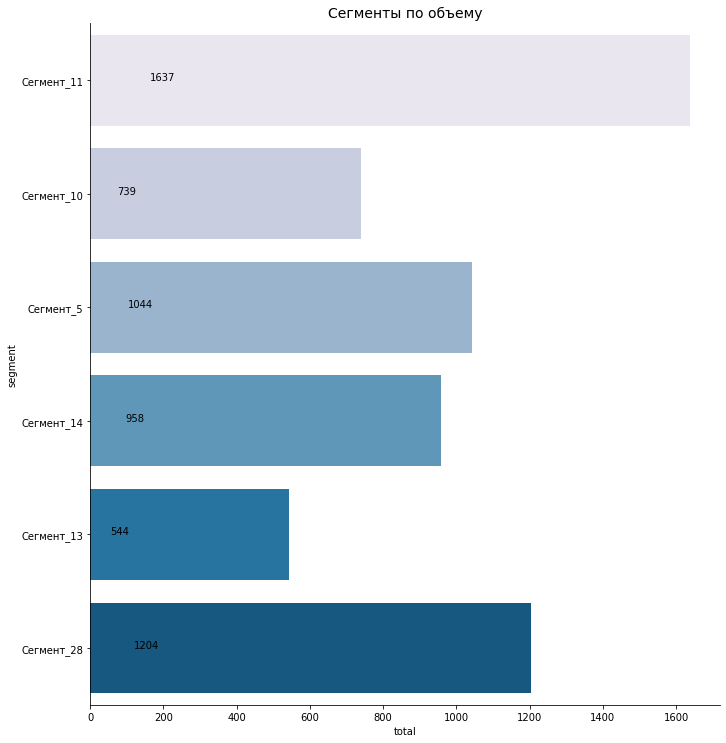

In [88]:
g = sns.catplot(data=sg, kind='bar', x='total', y='segment', palette='PuBu', height=10)

for i in range(sg.shape[0]):
    g.ax.text(sg.iloc[i]['total'] // 10, i, sg.iloc[i]['total'])

plt.title('Сегменты по объему', fontsize=14)
plt.show()

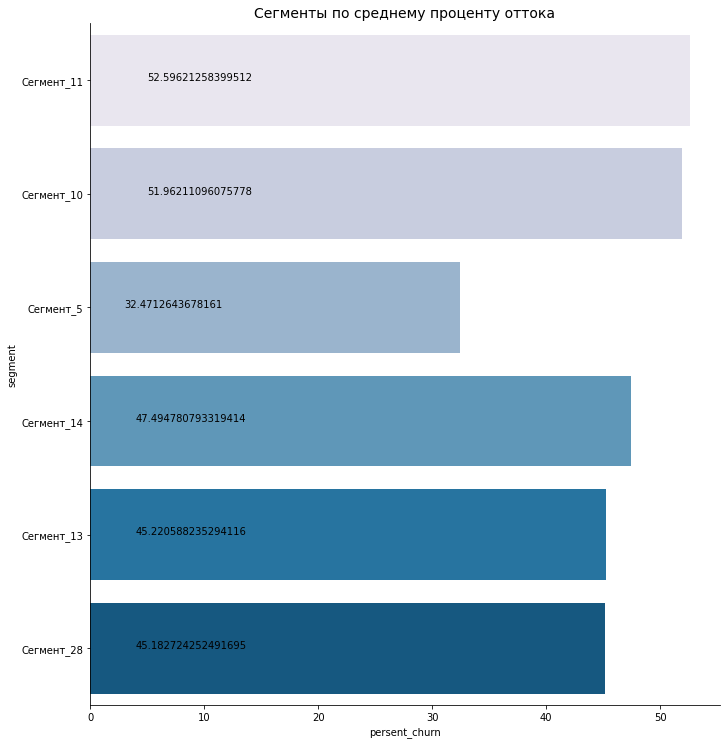

In [89]:
g = sns.catplot(data=sg, kind='bar', x='persent_churn', y='segment', palette='PuBu', height=10)

for i in range(sg.shape[0]):
    g.ax.text(sg.iloc[i]['persent_churn'] // 10, i, sg.iloc[i]['persent_churn'])

plt.title('Сегменты по среднему проценту оттока', fontsize=14)
plt.show()

Предварительные выводы:
На данном этапе мы рассмотрели различные комбинации параметров дсформировали сегменты и выявили параметры с высокой взаимосвязью с процентом оттока.
Топовым сегментом по показателю объема и проценту оттока является Сегмент №11, в него входят активные клиенты с оценкой собственности 3 и выше и скоринговой оценкой более 840. Исследуюя возрастные диапазоны, мы выявили для каждого диапазона комбинацию признаков с наибольшим объемом и процентом оттока, у диапазона 25-35 - это Сегмент №14, с показателем оттока более 47 % и для диапазона 50-60 лет - это сегмент №13 с показателем оттока 45%, что особенно важно, комбинации параметров сегментов в обоих диапазонах одинаковые, это показатели из топового сегмента: активные клиенты с оценкой собственности более 3. Так же отмечу, что показатель оттока в группах с диапазоном возраста 25-35 лет выше, кроме того объем этих групп почти в два раза больше. Соответственно мы ещё раз убедились в весомости данных признаков при выявлении причин оттока. Сегмент №10 с показателем оттока более 50%, но по объему в два раза меньше, чем Сегмент №11, такое резкое различие при смене только одного показателя, вместо скоринговой оценки, количество продуктов банка - 3 и более. Сегмент №28 состоит из активных клиентов использующих кредитную карту и имеющие оценку собственности 3 и более, у данного сегмента процент оттока на 7% ниже, только за счет замены одного параметра. Для сравнения включила в итоговую выборку Сегмент №5 с самым низким процентом оттока 32%, где выделены мужчины возраста 25-35 лет со скоринговой оценкой более 840. Высокие показатели объема и процента оттока так же выявлены у Сегментов 10 и 28, в которых помимо прочих рассмотрены такие признаки, как отсутствие кредитной карты и количество продуктов банка три или более. Таким образом, параметрами, которые больше всего влияют на показатели оттока клиентов являются: оценка собственности, скоринговая оценка и активность клиента в последние 30 дней. 
Рекомендации: 
Сделать чек-ап технических ошибок в приложении и на сайте банка, возможно какая-то системная ошибка побуждает клиентов отказываться от услуг;
Проверить систему оценки собственности клиентов, во-первых, при подготовке данных мы выявили взаимосвязь отсутствия данных о балансе с нулевой оценкой собственности, во-вторых, судя по сегментам, клиенты с высокой оценкой собственности неудовлетворены продуктами банка
Исходя из того, что процент оттока связан с высокой скоринговой оценкой банка, можно предположить, что в отток у нас попадают платежеспособные клиенты с высокой оценкой собственности, возможно рассмотреть содержание кредитной политики банка, стоимость и вероятность одобрения кредитных продуктов банка исходя из скорингового рейтинга, возможно кредитная политика не соответствует рыночным условиям продуктов банка с высоким кредитным рейтингом.
Влияние критериев пола и возраста не так велико, но тем не менее значительно и требует внимания.
